# Detecting Mailicious URL with vairous ML Algorithms

In [2]:
!pip install tld

In [3]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

## Reading Data from the dataset

In [4]:
data = pd.read_csv('./malicious_url_dataset.csv')
data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420464 entries, 0 to 420463
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     420464 non-null  object
 1   label   420464 non-null  object
dtypes: object(2)
memory usage: 6.4+ MB


## checking for null values in the dataset

In [6]:
data.isnull().sum()

url      0
label    0
dtype: int64

In [7]:
count = data.label.value_counts()
count

good    344821
bad      75643
Name: label, dtype: int64

## plotting data aganaist the good vs bad counts in the dataset

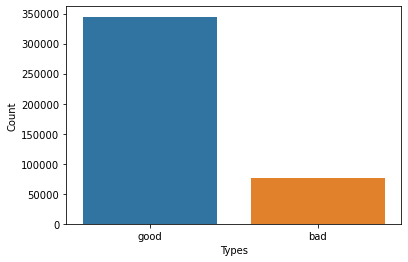

In [8]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

## Features Extraction for the dataset

### Replaces www with empty string for further processing of data

In [9]:
data['url'] = data['url'].replace('www.', '', regex=True)
data

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad
...,...,...
420459,23.227.196.215/,bad
420460,apple-checker.org/,bad
420461,apple-iclods.org/,bad
420462,apple-uptoday.org/,bad


### Checking the url length and verifying the domain which it belongs to

In [10]:
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

In [11]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [12]:
data['domain'] = data['url'].apply(lambda i: process_tld(i))

In [13]:
data.head()

,url,label,url_len,domain
0,diaryofagameaddict.com,bad,22,diaryofagameaddict.com
1,espdesign.com.au,bad,16,espdesign.com.au
2,iamagameaddict.com,bad,18,iamagameaddict.com
3,kalantzis.net,bad,13,kalantzis.net
4,slightlyoffcenter.net,bad,21,slightlyoffcenter.net


### Verifying the url contains the following features  '@','?','-','=','.','#','%','+','$','!','*',',','//'

In [14]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    data[a] = data['url'].apply(lambda i: i.count(a))

In [15]:
data.head()

,url,label,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,diaryofagameaddict.com,bad,22,diaryofagameaddict.com,0,0,0,0,1,0,0,0,0,0,0,0,0
1,espdesign.com.au,bad,16,espdesign.com.au,0,0,0,0,2,0,0,0,0,0,0,0,0
2,iamagameaddict.com,bad,18,iamagameaddict.com,0,0,0,0,1,0,0,0,0,0,0,0,0
3,kalantzis.net,bad,13,kalantzis.net,0,0,0,0,1,0,0,0,0,0,0,0,0
4,slightlyoffcenter.net,bad,21,slightlyoffcenter.net,0,0,0,0,1,0,0,0,0,0,0,0,0


### parsing url wether it contains any abnormal with urllib.parse library and plotting bar charts

In [16]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [17]:
data['abnormal_url'] = data['url'].apply(lambda i: abnormal_url(i))

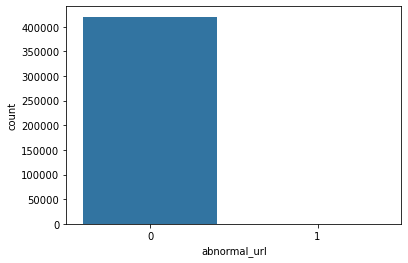

In [18]:
sns.countplot(x='abnormal_url', data=data);

### parsing url wether it contains any https or http keywords with urllib.parse library and plotting bar charts

In [19]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [21]:
data['https'] = data['url'].apply(lambda i: httpSecure(i))

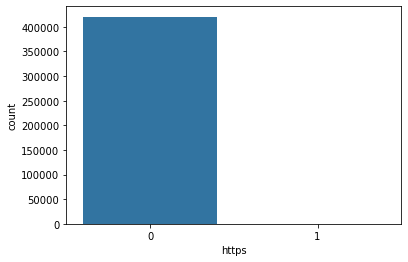

In [22]:
sns.countplot(x='https', data=data);

### Checking for digit and letter counts in the url

In [23]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [24]:
data['digits']= data['url'].apply(lambda i: digit_count(i))

In [25]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [26]:
data['letters']= data['url'].apply(lambda i: letter_count(i))

### Checking for shortening service of url in the given dataset

In [27]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [28]:
data['Shortining_Service'] = data['url'].apply(lambda x: Shortining_Service(x))

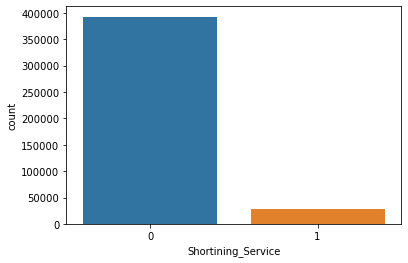

In [29]:
sns.countplot(x='Shortining_Service', data=data);

### Checking for ip_adress in the given url

In [30]:
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [31]:
data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))

In [32]:
data['having_ip_address'].value_counts()

0    416135
1      4329
Name: having_ip_address, dtype: int64

## HeatMap of the features extracted from the dataset

<AxesSubplot:>

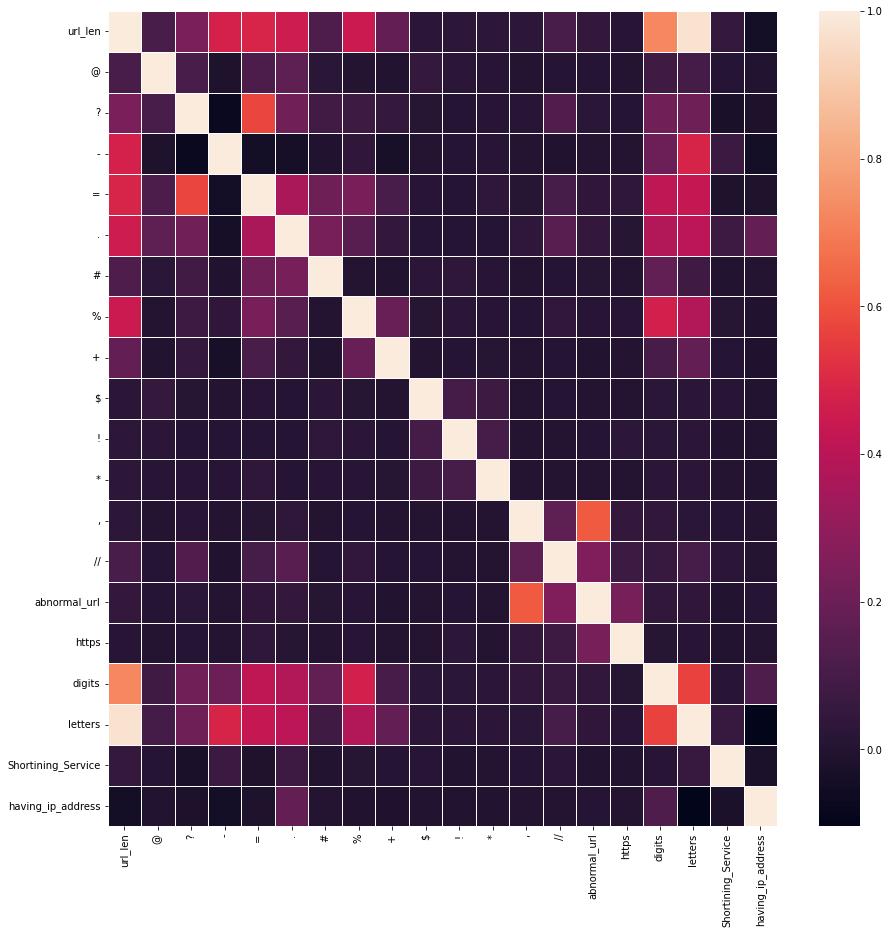

In [33]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)

### labelling good as 1  bad as 0 under category column 

In [36]:
rem = {"Category": {"bad": 0, "good": 1}}
data['Category'] = data['label']
data = data.replace(rem)

In [37]:
data

,url,label,url_len,domain,@,?,-,=,.,#,...,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address,Category
0,diaryofagameaddict.com,bad,22,diaryofagameaddict.com,0,0,0,0,1,0,...,0,0,0,0,0,0,21,1,0,0
1,espdesign.com.au,bad,16,espdesign.com.au,0,0,0,0,2,0,...,0,0,0,0,0,0,14,0,0,0
2,iamagameaddict.com,bad,18,iamagameaddict.com,0,0,0,0,1,0,...,0,0,0,0,0,0,17,1,0,0
3,kalantzis.net,bad,13,kalantzis.net,0,0,0,0,1,0,...,0,0,0,0,0,0,12,0,0,0
4,slightlyoffcenter.net,bad,21,slightlyoffcenter.net,0,0,0,0,1,0,...,0,0,0,0,0,0,20,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420459,23.227.196.215/,bad,15,None,0,0,0,0,3,0,...,0,0,0,0,0,11,0,0,1,0
420460,apple-checker.org/,bad,18,apple-checker.org,0,0,1,0,1,0,...,0,0,0,0,0,0,15,0,0,0
420461,apple-iclods.org/,bad,17,apple-iclods.org,0,0,1,0,1,0,...,0,0,0,0,0,0,14,0,0,0
420462,apple-uptoday.org/,bad,18,apple-uptoday.org,0,0,1,0,1,0,...,0,0,0,0,0,0,15,0,0,0


## Data Extraction with features for train and test purpose

In [38]:
X = data.drop(['url','label','Category','domain'],axis=1)
y = data['Category']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [40]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Using DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, KNeighborsClassifier, SGDClassifier, ExtraTreesClassifier, GaussianNB algorithms for classifaction with  Confusion matrix

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  87.84%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.72      0.51      0.60     14985
           1       0.90      0.96      0.93     69108

    accuracy                           0.88     84093
   macro avg       0.81      0.74      0.76     84093
weighted avg       0.87      0.88      0.87     84093

             Confusion_matrix 


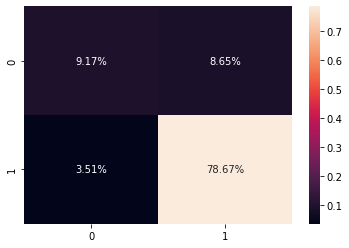

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  88.62%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.78      0.50      0.61     14985
           1       0.90      0.97      0.93     69108

    accuracy                           0.89     84093
   macro avg       0.84      0.74      0.77     84093
weighted avg       0.88      0.89      0.88     84093

             Confusion_matrix 


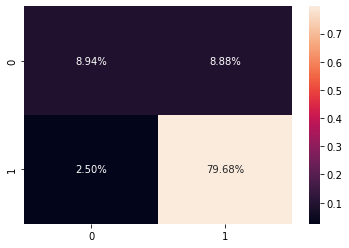

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 
Test Accuracy :  85.06%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.79      0.22      0.35     14985
           1       0.85      0.99      0.92     69108

    accuracy                           0.85     84093
   macro avg       0.82      0.60      0.63     84093
weighted avg       0.84      0.85      0.81     84093

             Confusion_matrix 


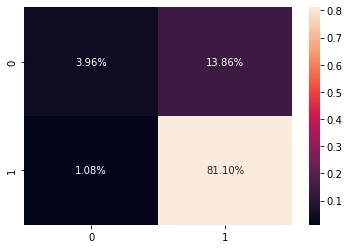

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  87.20%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.72      0.47      0.57     14985
           1       0.89      0.96      0.92     69108

    accuracy                           0.87     84093
   macro avg       0.80      0.71      0.75     84093
weighted avg       0.86      0.87      0.86     84093

             Confusion_matrix 


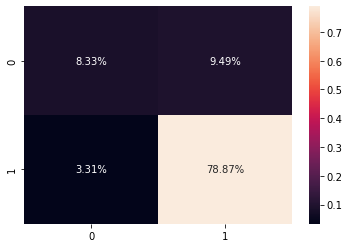

###################- End -###################
#############################################
######-Model => <class 'sklearn.linear_model._stochastic_gradient.SGDClassifier'> 
Test Accuracy :  83.83%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.96      0.10      0.18     14985
           1       0.84      1.00      0.91     69108

    accuracy                           0.84     84093
   macro avg       0.90      0.55      0.54     84093
weighted avg       0.86      0.84      0.78     84093

             Confusion_matrix 


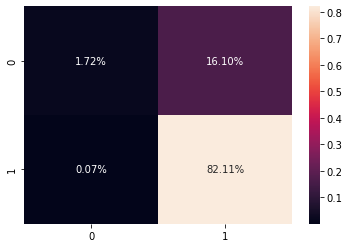

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Test Accuracy :  88.47%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.76      0.51      0.61     14985
           1       0.90      0.96      0.93     69108

    accuracy                           0.88     84093
   macro avg       0.83      0.74      0.77     84093
weighted avg       0.88      0.88      0.88     84093

             Confusion_matrix 


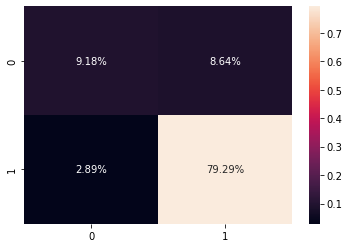

###################- End -###################
#############################################
######-Model => <class 'sklearn.naive_bayes.GaussianNB'> 
Test Accuracy :  84.32%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.84      0.15      0.25     14985
           1       0.84      0.99      0.91     69108

    accuracy                           0.84     84093
   macro avg       0.84      0.57      0.58     84093
weighted avg       0.84      0.84      0.79     84093

             Confusion_matrix 


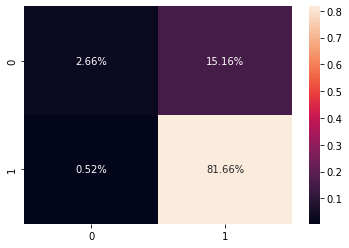

###################- End -###################


In [41]:
models = [DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,KNeighborsClassifier,SGDClassifier,
         ExtraTreesClassifier,GaussianNB]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

## Output of the algorithms with their respective accuracy for the given dataset

In [42]:
output = pd.DataFrame({"Model":['Decision Tree Classifier','Random Forest Classifier',
                                'AdaBoost Classifier','KNeighbors Classifier','SGD Classifier',
                                'Extra Trees Classifier','Gaussian NB'],
                      "Accuracy":accuracy_test})

In [43]:
output

,Model,Accuracy
0,Decision Tree Classifier,0.878361
1,Random Forest Classifier,0.886197
2,AdaBoost Classifier,0.850606
3,KNeighbors Classifier,0.871987
4,SGD Classifier,0.838310
5,Extra Trees Classifier,0.884652
6,Gaussian NB,0.843162


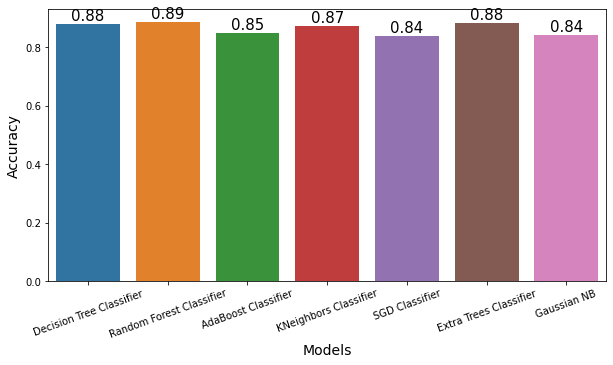

In [44]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()